In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [23]:
# Importing the Dataset

In [24]:
data = pd.read_csv('C:\\Users\\jha9001\\OneDrive - The Nielsen Company\\Desktop\\Learn\\New folder\\Datatrained_PG_DSci\\FlipRobo\\Project 2 - Housing Project\\Project-Housing--2---1---1-\\Project-Housing_splitted\\train.csv')

In [25]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [26]:
data.shape

(1168, 81)

In [237]:
test = pd.read_csv('C:\\Users\\jha9001\\OneDrive - The Nielsen Company\\Desktop\\Learn\\New folder\\Datatrained_PG_DSci\\FlipRobo\\Project 2 - Housing Project\\Project-Housing--2---1---1-\\Project-Housing_splitted\\test.csv')

In [238]:
test.shape

(292, 80)

## EDA

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [30]:
pd.options.display.max_rows = 999
data.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFin

In [42]:
for i in data.columns:
    if data[i].isna().sum() != 0:
        print(f"{i} = {data[i].isna().sum()} ----> {data[i].dtypes}")
        print(f"{i} = {data[i].nunique()}\n\n")

LotFrontage = 214 ----> float64
LotFrontage = 106


Alley = 1091 ----> object
Alley = 2


MasVnrType = 7 ----> object
MasVnrType = 4


MasVnrArea = 7 ----> float64
MasVnrArea = 283


BsmtQual = 30 ----> object
BsmtQual = 4


BsmtCond = 30 ----> object
BsmtCond = 4


BsmtExposure = 31 ----> object
BsmtExposure = 4


BsmtFinType1 = 30 ----> object
BsmtFinType1 = 6


BsmtFinType2 = 31 ----> object
BsmtFinType2 = 6


FireplaceQu = 551 ----> object
FireplaceQu = 5


GarageType = 64 ----> object
GarageType = 6


GarageYrBlt = 64 ----> float64
GarageYrBlt = 97


GarageFinish = 64 ----> object
GarageFinish = 3


GarageQual = 64 ----> object
GarageQual = 5


GarageCond = 64 ----> object
GarageCond = 5


PoolQC = 1161 ----> object
PoolQC = 3


Fence = 931 ----> object
Fence = 4


MiscFeature = 1124 ----> object
MiscFeature = 4




In [46]:
for i in data.columns:
    if data[i].isna().sum() != 0:
        print(f"{i}:\n {data[i].value_counts()}\n\n")

LotFrontage:
 60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
65.0      35
85.0      26
90.0      20
78.0      19
73.0      16
24.0      16
68.0      16
79.0      14
21.0      14
64.0      14
51.0      13
72.0      13
55.0      13
100.0     12
59.0      12
82.0      12
63.0      11
71.0      11
74.0      11
53.0      10
69.0      10
66.0      10
88.0      10
84.0       9
34.0       9
67.0       9
77.0       8
40.0       8
52.0       8
43.0       8
76.0       8
92.0       8
57.0       7
86.0       7
35.0       7
95.0       7
62.0       7
61.0       7
94.0       6
54.0       6
44.0       6
96.0       6
81.0       6
120.0      6
98.0       6
41.0       6
107.0      5
87.0       5
30.0       5
36.0       5
105.0      5
89.0       5
58.0       5
93.0       5
91.0       4
49.0       4
83.0       3
103.0      3
110.0      3
130.0      3
48.0       3
99.0       3
104.0      3
108.0      3
56.0       3
47.0       3
32.0       3
37.0       3
116.0      2
121.0      2
109.0      

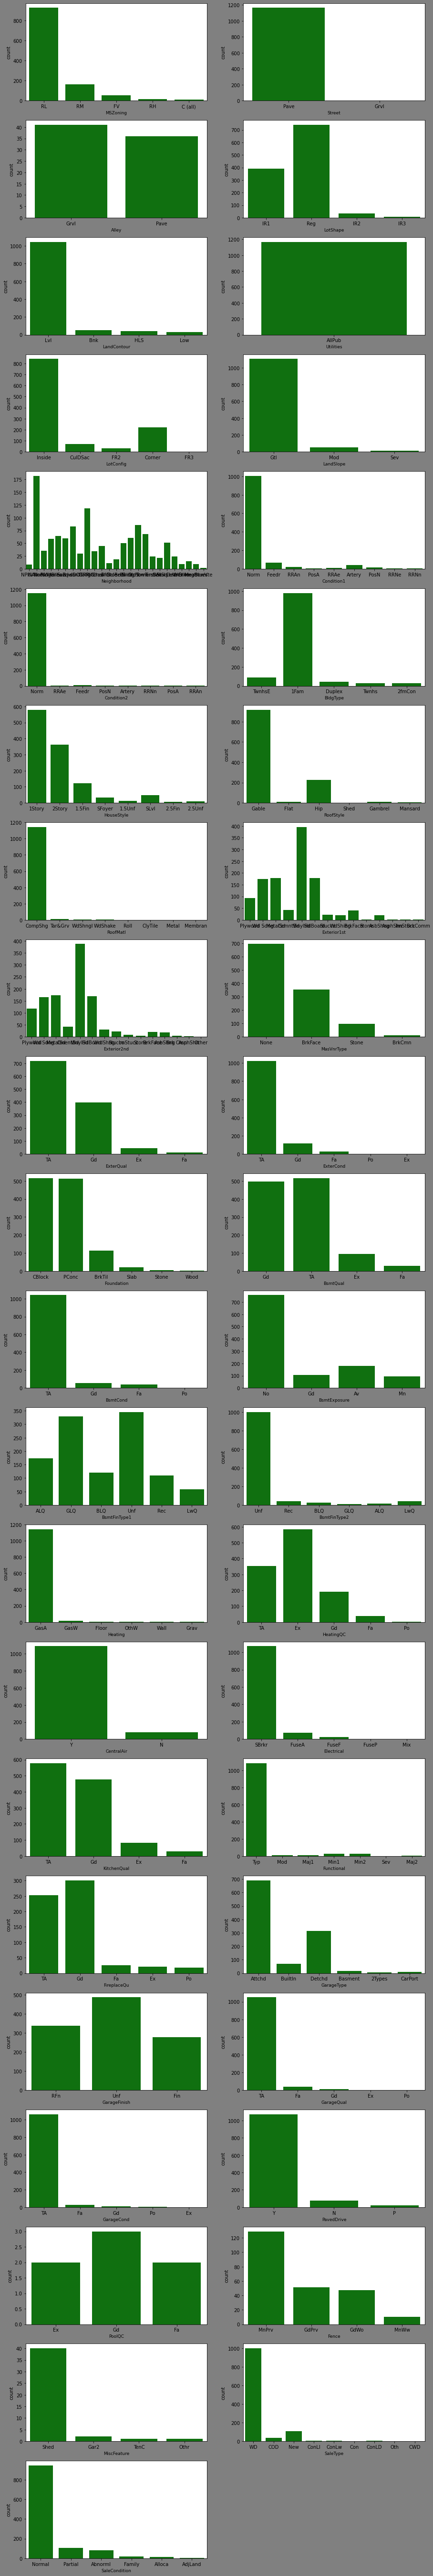

In [50]:
plt.figure(figsize=(15,180),facecolor='grey')
plotnumber = 1


for column in data:
    if data[column].dtypes == 'object':
        if plotnumber<=80:
            ax=plt.subplot(40,2,plotnumber)
            sns.countplot(data[column],color = 'green')
            plt.xlabel(column,fontsize=9)

        plotnumber+=1
plt.show()

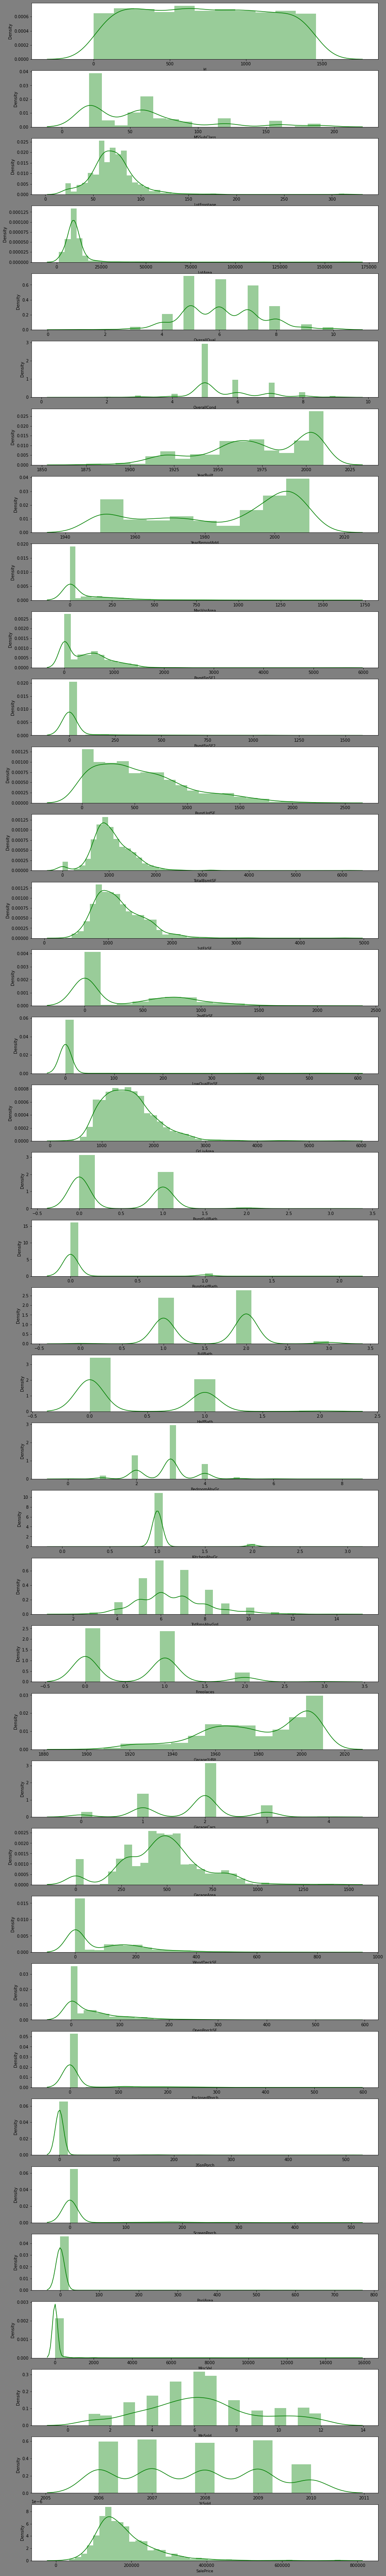

In [52]:
plt.figure(figsize=(15,240),facecolor='grey')
plotnumber = 1


for column in data:
    if data[column].dtypes != 'object':
        if plotnumber<=80:
            ax=plt.subplot(80,1,plotnumber)
            sns.distplot(data[column],color = 'green')
            plt.xlabel(column,fontsize=9)

        plotnumber+=1
plt.show()

In [54]:
data.SalePrice.isna().sum()

0

In [55]:
# dropping 'Alley', 'PoolQC', 'Fence', 'FireplaceQu' & 'MiscFeature' as it had more than 50% nans.
# dropping 'Id','Utilities' as it it is all unique.

In [56]:
data = data.drop(columns = ['Alley', 'PoolQC', 'Fence', 'FireplaceQu', 'MiscFeature', 'Id', 'Utilities'], axis=1)

In [57]:
data.shape

(1168, 75)

In [61]:
for i in data.columns:
    if data[i].isna().sum() != 0:
        print(f"{i} = {data[i].isna().sum()} ----> {data[i].dtypes}")
        print(f"{i} = {data[i].nunique()}")
        print(f"{i} = {data[i].value_counts()}\n\n")

LotFrontage = 214 ----> float64
LotFrontage = 106
LotFrontage = 60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
65.0      35
85.0      26
90.0      20
78.0      19
73.0      16
24.0      16
68.0      16
79.0      14
21.0      14
64.0      14
51.0      13
72.0      13
55.0      13
100.0     12
59.0      12
82.0      12
63.0      11
71.0      11
74.0      11
53.0      10
69.0      10
66.0      10
88.0      10
84.0       9
34.0       9
67.0       9
77.0       8
40.0       8
52.0       8
43.0       8
76.0       8
92.0       8
57.0       7
86.0       7
35.0       7
95.0       7
62.0       7
61.0       7
94.0       6
54.0       6
44.0       6
96.0       6
81.0       6
120.0      6
98.0       6
41.0       6
107.0      5
87.0       5
30.0       5
36.0       5
105.0      5
89.0       5
58.0       5
93.0       5
91.0       4
49.0       4
83.0       3
103.0      3
110.0      3
130.0      3
48.0       3
99.0       3
104.0      3
108.0      3
56.0       3
47.0       3
32.0       3


In [62]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['BsmtQual'] = data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond'] = data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])

data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['GarageType'] = data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mode()[0])
data['GarageFinish'] = data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual'] = data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond'] = data['GarageCond'].fillna(data['GarageCond'].mode()[0])

In [64]:
data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

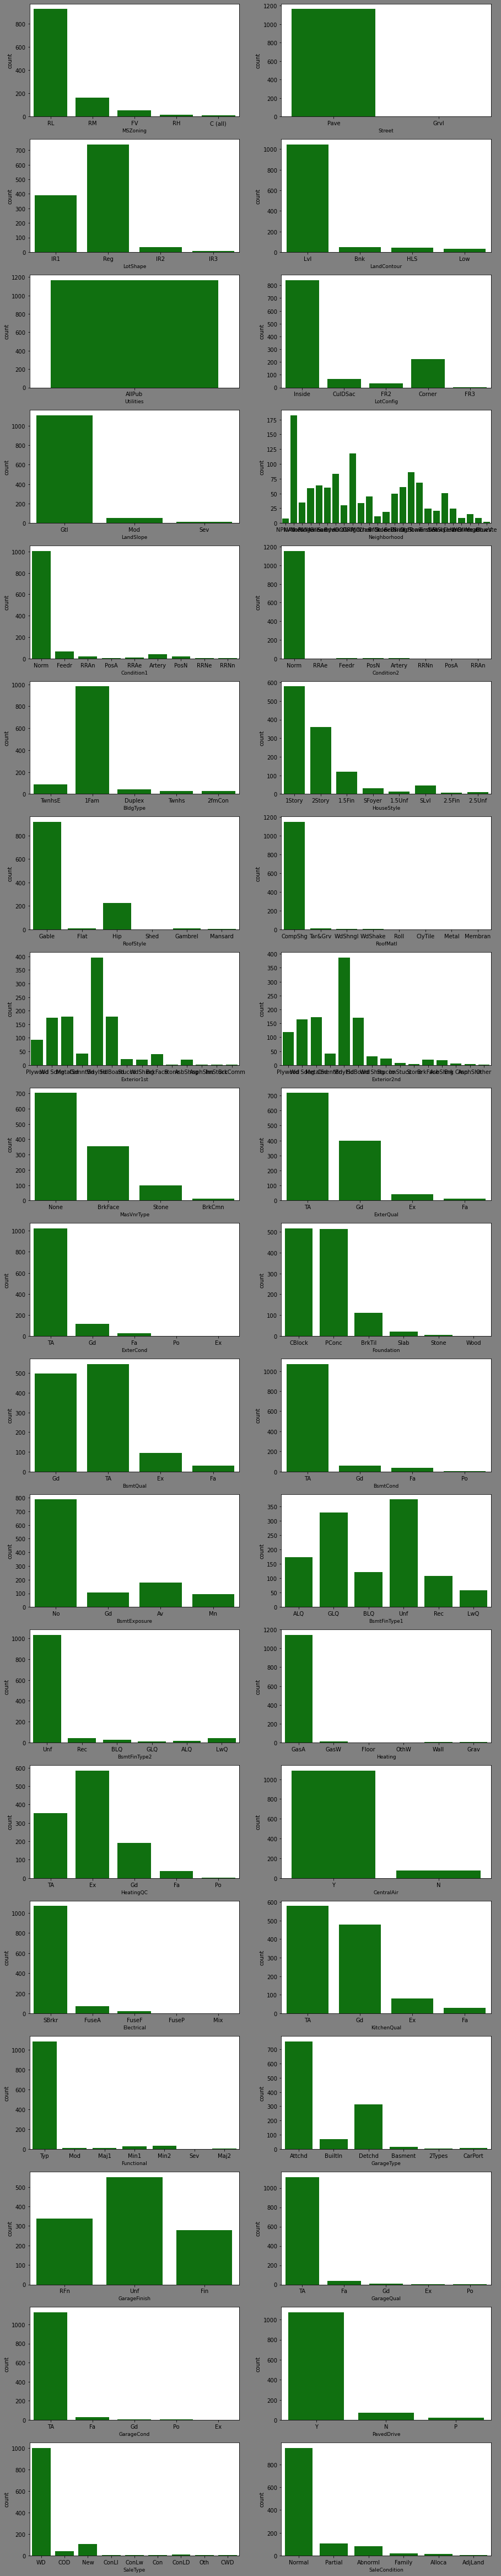

In [65]:
plt.figure(figsize=(15,180),facecolor='grey')
plotnumber = 1


for column in data:
    if data[column].dtypes == 'object':
        if plotnumber<=80:
            ax=plt.subplot(40,2,plotnumber)
            sns.countplot(data[column],color = 'green')
            plt.xlabel(column,fontsize=9)

        plotnumber+=1
plt.show()

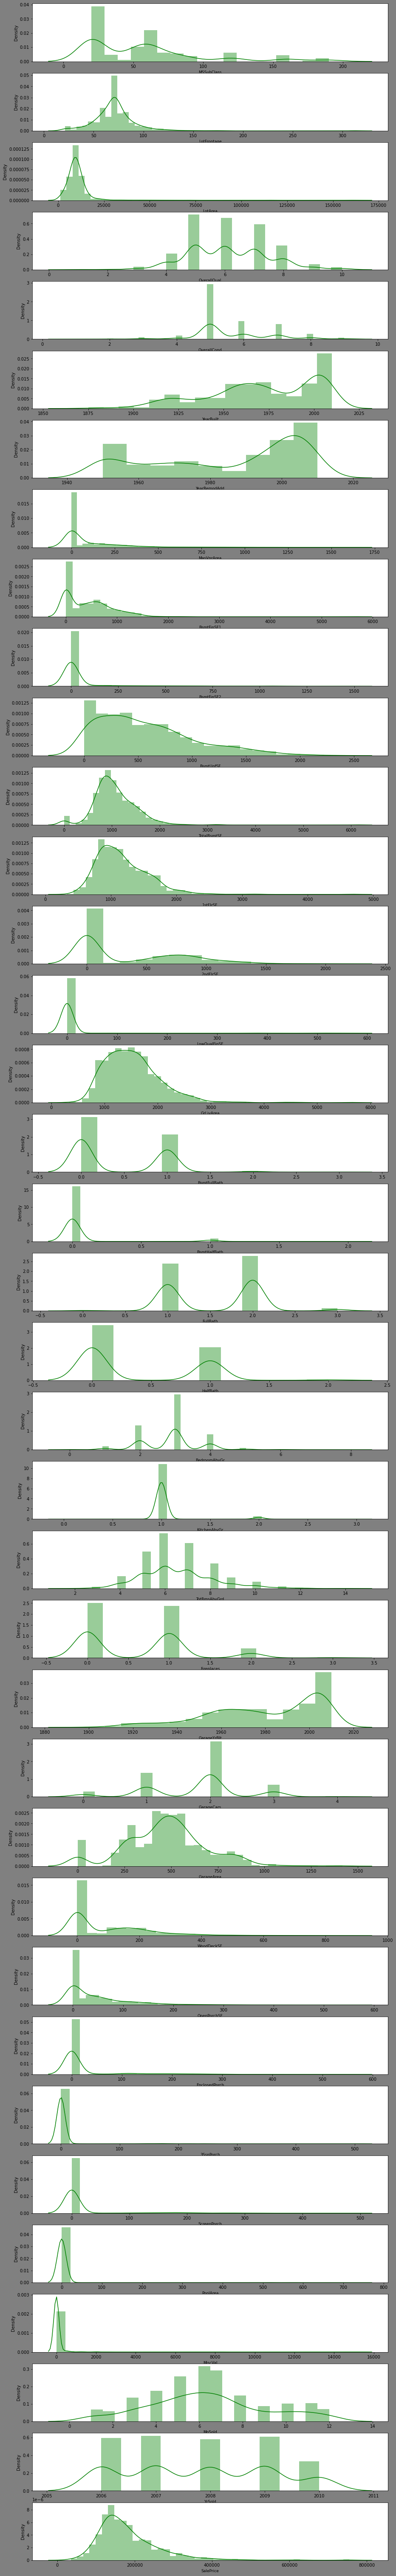

In [66]:
plt.figure(figsize=(15,240),facecolor='grey')
plotnumber = 1


for column in data:
    if data[column].dtypes != 'object':
        if plotnumber<=80:
            ax=plt.subplot(80,1,plotnumber)
            sns.distplot(data[column],color = 'green')
            plt.xlabel(column,fontsize=9)

        plotnumber+=1
plt.show()

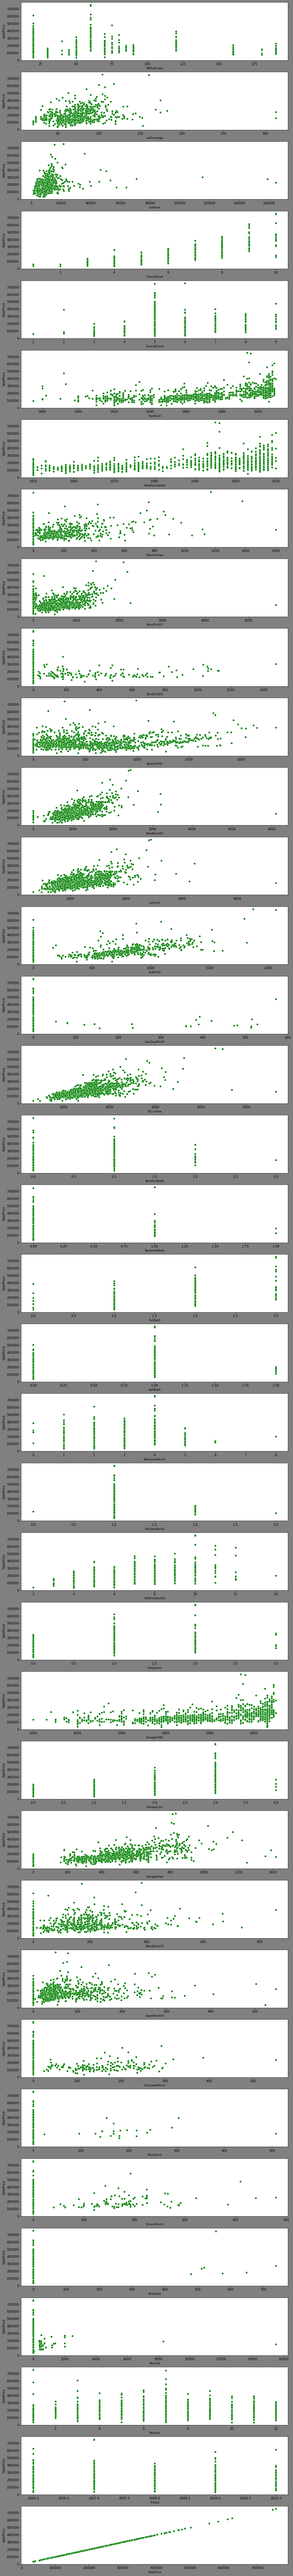

In [68]:
plt.figure(figsize=(15,320),facecolor='grey')
plotnumber = 1


for column in data:
    if data[column].dtypes != 'object':
        if plotnumber<=80:
            ax=plt.subplot(80,1,plotnumber)
            sns.scatterplot(data[column],data['SalePrice'],color = 'green')
            plt.xlabel(column,fontsize=9)

        plotnumber+=1
plt.show()

In [69]:
# encoding categorical variables

In [70]:
from sklearn.preprocessing import OrdinalEncoder
for i in data.columns:
    if data[i].dtypes == 'object':
        enco = OrdinalEncoder(categories=[data[i].unique()])
        data[i] = enco.fit_transform(data[[i]])

In [71]:
for i in data.columns:
    print(f"{i} = {data[i].unique()} \n {data[i].value_counts()}\n\n")

MSSubClass = [120  20  60  50  70  30 160  85  45  90  40  80 190  75 180] 
 20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64


MSZoning = [0. 1. 2. 3. 4.] 
 0.0    928
1.0    163
2.0     52
3.0     16
4.0      9
Name: MSZoning, dtype: int64


LotFrontage = [ 70.9884696  95.         92.        105.         58.         88.
  70.         80.         50.         44.        129.         59.
  55.         64.         24.         68.         71.         74.
  61.         60.        120.         84.        141.         30.
  65.         76.        100.         85.         75.        107.
 122.         82.         62.         73.         79.         77.
  41.         69.         90.         96.         72.         34.
  78.         63.         40.         98.        160.        108.
 128.         51.         81.         99.         66.         37.
 

In [76]:
data.loc[data['Street'] == 1]

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
759           20       4.0     66.00000     8712     1.0       1.0   
1094          30       4.0    120.00000    18000     1.0       1.0   
1123         190       0.0     70.98847   164660     1.0       0.0   
1139          90       0.0     81.00000    11841     1.0       1.0   

      LandContour  LotConfig  LandSlope  Neighborhood  ...  EnclosedPorch  \
759           1.0        0.0        1.0           7.0  ...              0   
1094          3.0        0.0        0.0           7.0  ...              0   
1123          2.0        3.0        2.0          17.0  ...              0   
1139          0.0        0.0        0.0           6.0  ...              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
759           0            0         0       54       6    2010       0.0   
1094          0            0         0      560       8    2008       6.0   
1123          0            0         0      700       8    2008       0.0   
1139          0            0         0        0       5    2007       0.0   

      SaleCondition  SalePrice  
759             4.0      55993  
1094            0.0      81000  
1123            0.0     228950  
1139            0.0     118500  

[4 rows x 74 columns]

In [77]:
# 'Street' does not have proper data distribution.so dropping this
data = data.drop(columns = ['Street'], axis=1)

In [78]:
data.shape

(1168, 73)

### Outliers

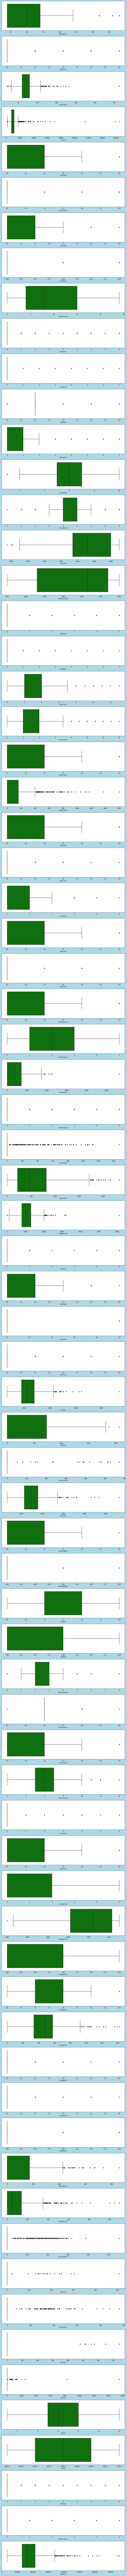

In [81]:
plt.figure(figsize=(15,320),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=73:
        ax=plt.subplot(73,1,plotnumber)
        sns.boxplot(data[column], color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [91]:
data.nunique()

MSSubClass        15
MSZoning           5
LotFrontage      107
LotArea          892
LotShape           4
LandContour        4
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         9
Condition2         8
BldgType           5
HouseStyle         8
OverallQual       10
OverallCond        9
YearBuilt        110
YearRemodAdd      61
RoofStyle          6
RoofMatl           8
Exterior1st       14
Exterior2nd       15
MasVnrType         4
MasVnrArea       284
ExterQual          4
ExterCond          5
Foundation         6
BsmtQual           4
BsmtCond           4
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       551
BsmtFinType2       6
BsmtFinSF2       122
BsmtUnfSF        681
TotalBsmtSF      636
Heating            6
HeatingQC          5
CentralAir         2
Electrical         5
1stFlrSF         669
2ndFlrSF         351
LowQualFinSF      21
GrLivArea        746
BsmtFullBath       4
BsmtHalfBath       3
FullBath           4
HalfBath           3
BedroomAbvGr 

In [92]:
con = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
'1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
'ScreenPorch', 'SalePrice']

In [82]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

In [85]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

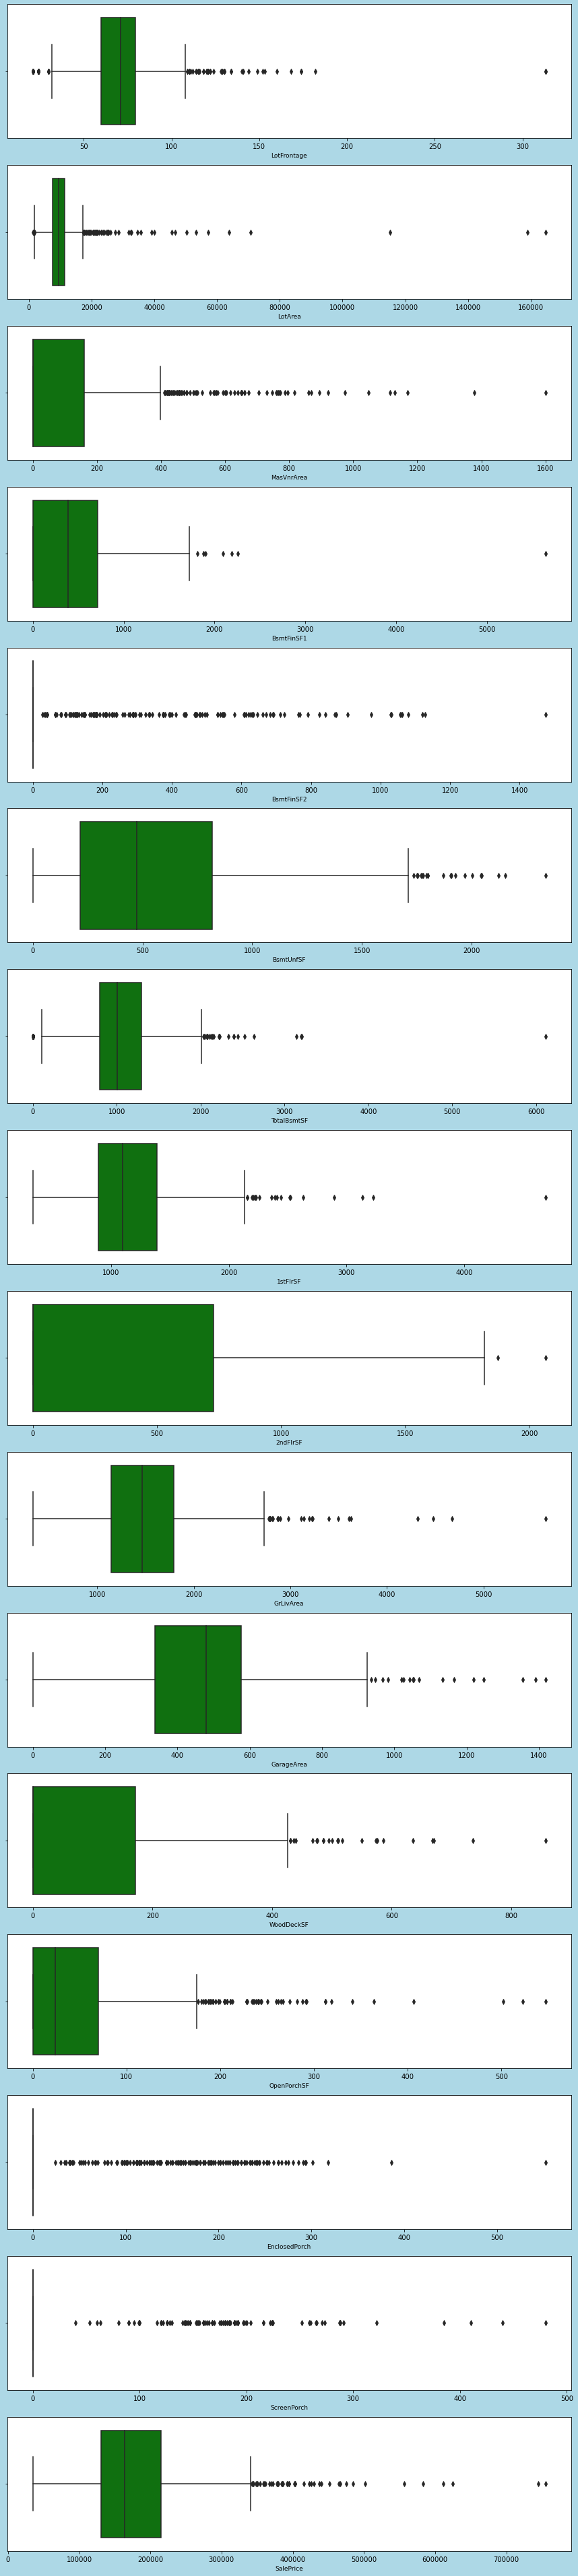

In [96]:
plt.figure(figsize=(15,320),facecolor='lightblue')
plotnumber = 1


for column in con:
    if plotnumber<=73:
        ax=plt.subplot(73,1,plotnumber)
        sns.boxplot(data[column], color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [100]:
SalePrice_high = q3.SalePrice + (1.5 * (iqr.SalePrice))
SalePrice_low = q1.SalePrice - (1.5 * (iqr.SalePrice))
Drop_SalePrice = np.where((data.SalePrice > SalePrice_high) | (data.SalePrice < SalePrice_low) )
Drop_SalePrice
data = data.drop(data.index[Drop_SalePrice])
data.shape

(1123, 73)

<AxesSubplot:>

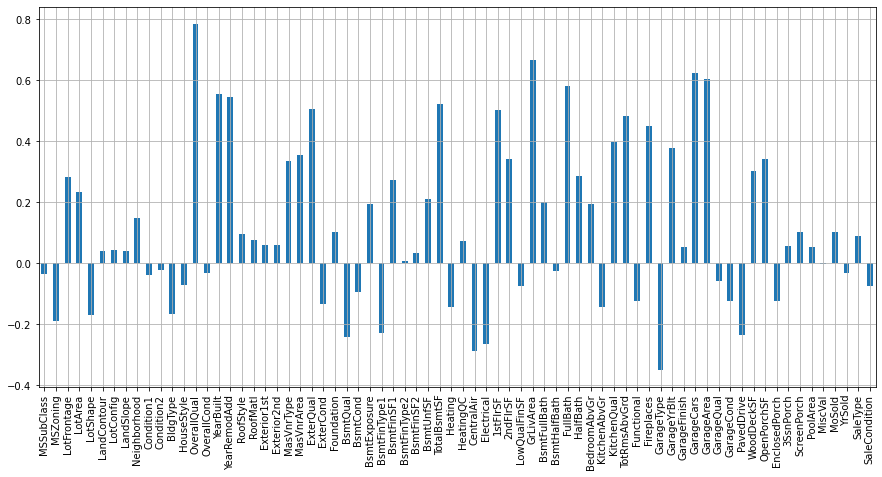

In [101]:
# checking the corelation of features with target label
data.drop('SalePrice',axis =1).corrwith(data.SalePrice).plot(kind = 'bar', grid=True, figsize = (15,7))

In [107]:
con

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [108]:
LotFrontage_high = q3.LotFrontage + (1.5 * (iqr.LotFrontage))
LotFrontage_low = q1.LotFrontage - (1.5 * (iqr.LotFrontage))
Drop_LotFrontage = np.where((data.LotFrontage > LotFrontage_high) | (data.LotFrontage < LotFrontage_low) )
Drop_LotFrontage
data = data.drop(data.index[Drop_LotFrontage])
data.shape

(1047, 73)

In [110]:
LotArea_high = q3.LotArea + (1.5 * (iqr.LotArea))
LotArea_low = q1.LotArea - (1.5 * (iqr.LotArea))
Drop_LotArea = np.where((data.LotArea > LotArea_high) | (data.LotArea < LotArea_low) )
Drop_LotArea
data = data.drop(data.index[Drop_LotArea])
data.shape

(1009, 73)

In [111]:
MasVnrArea_high = q3.MasVnrArea + (1.5 * (iqr.MasVnrArea))
MasVnrArea_low = q1.MasVnrArea - (1.5 * (iqr.MasVnrArea))
Drop_MasVnrArea = np.where((data.MasVnrArea > MasVnrArea_high) | (data.MasVnrArea < MasVnrArea_low) )
Drop_MasVnrArea
data = data.drop(data.index[Drop_MasVnrArea])
data.shape

(961, 73)

In [112]:
BsmtFinSF1_high = q3.BsmtFinSF1 + (1.5 * (iqr.BsmtFinSF1))
BsmtFinSF1_low = q1.BsmtFinSF1 - (1.5 * (iqr.BsmtFinSF1))
Drop_BsmtFinSF1 = np.where((data.BsmtFinSF1 > BsmtFinSF1_high) | (data.BsmtFinSF1 < BsmtFinSF1_low) )
Drop_BsmtFinSF1
data = data.drop(data.index[Drop_BsmtFinSF1])
data.shape

(961, 73)

In [113]:
TotalBsmtSF_high = q3.TotalBsmtSF + (1.5 * (iqr.TotalBsmtSF))
TotalBsmtSF_low = q1.TotalBsmtSF - (1.5 * (iqr.TotalBsmtSF))
Drop_TotalBsmtSF = np.where((data.TotalBsmtSF > TotalBsmtSF_high) | (data.TotalBsmtSF < TotalBsmtSF_low) )
Drop_TotalBsmtSF
data = data.drop(data.index[Drop_TotalBsmtSF])
data.shape

(927, 73)

In [115]:
GrLivArea_high = q3.GrLivArea + (1.5 * (iqr.GrLivArea))
GrLivArea_low = q1.GrLivArea - (1.5 * (iqr.GrLivArea))
Drop_GrLivArea = np.where((data.GrLivArea > GrLivArea_high) | (data.GrLivArea < GrLivArea_low) )
Drop_GrLivArea
data = data.drop(data.index[Drop_GrLivArea])
data.shape

(919, 73)

In [116]:
GarageArea_high = q3.GarageArea + (1.5 * (iqr.GarageArea))
GarageArea_low = q1.GarageArea - (1.5 * (iqr.GarageArea))
Drop_GarageArea = np.where((data.GarageArea > GarageArea_high) | (data.GarageArea < GarageArea_low) )
Drop_GarageArea
data = data.drop(data.index[Drop_GarageArea])
data.shape

(915, 73)

In [117]:
WoodDeckSF_high = q3.WoodDeckSF + (1.5 * (iqr.WoodDeckSF))
WoodDeckSF_low = q1.WoodDeckSF - (1.5 * (iqr.WoodDeckSF))
Drop_WoodDeckSF = np.where((data.WoodDeckSF > WoodDeckSF_high) | (data.WoodDeckSF < WoodDeckSF_low) )
Drop_WoodDeckSF
data = data.drop(data.index[Drop_WoodDeckSF])
data.shape

(906, 73)

In [118]:
OpenPorchSF_high = q3.OpenPorchSF + (1.5 * (iqr.OpenPorchSF))
OpenPorchSF_low = q1.OpenPorchSF - (1.5 * (iqr.OpenPorchSF))
Drop_OpenPorchSF = np.where((data.OpenPorchSF > OpenPorchSF_high) | (data.OpenPorchSF < OpenPorchSF_low) )
Drop_OpenPorchSF
data = data.drop(data.index[Drop_OpenPorchSF])
data.shape

(870, 73)

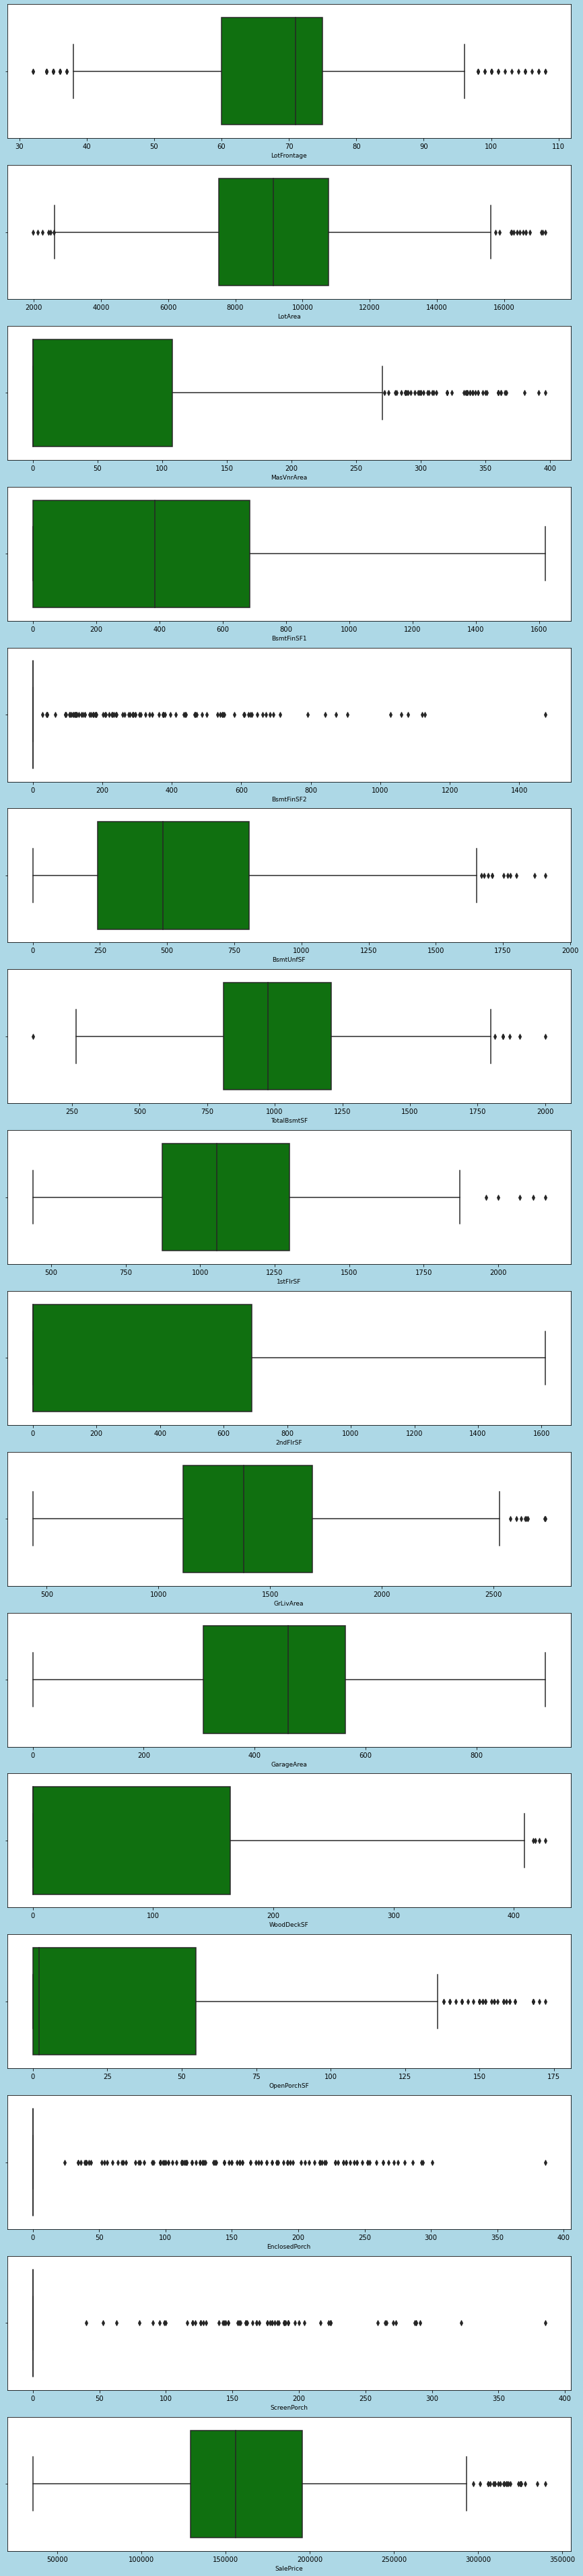

In [119]:
plt.figure(figsize=(15,320),facecolor='lightblue')
plotnumber = 1


for column in con:
    if plotnumber<=73:
        ax=plt.subplot(73,1,plotnumber)
        sns.boxplot(data[column], color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [120]:
# outlier treated

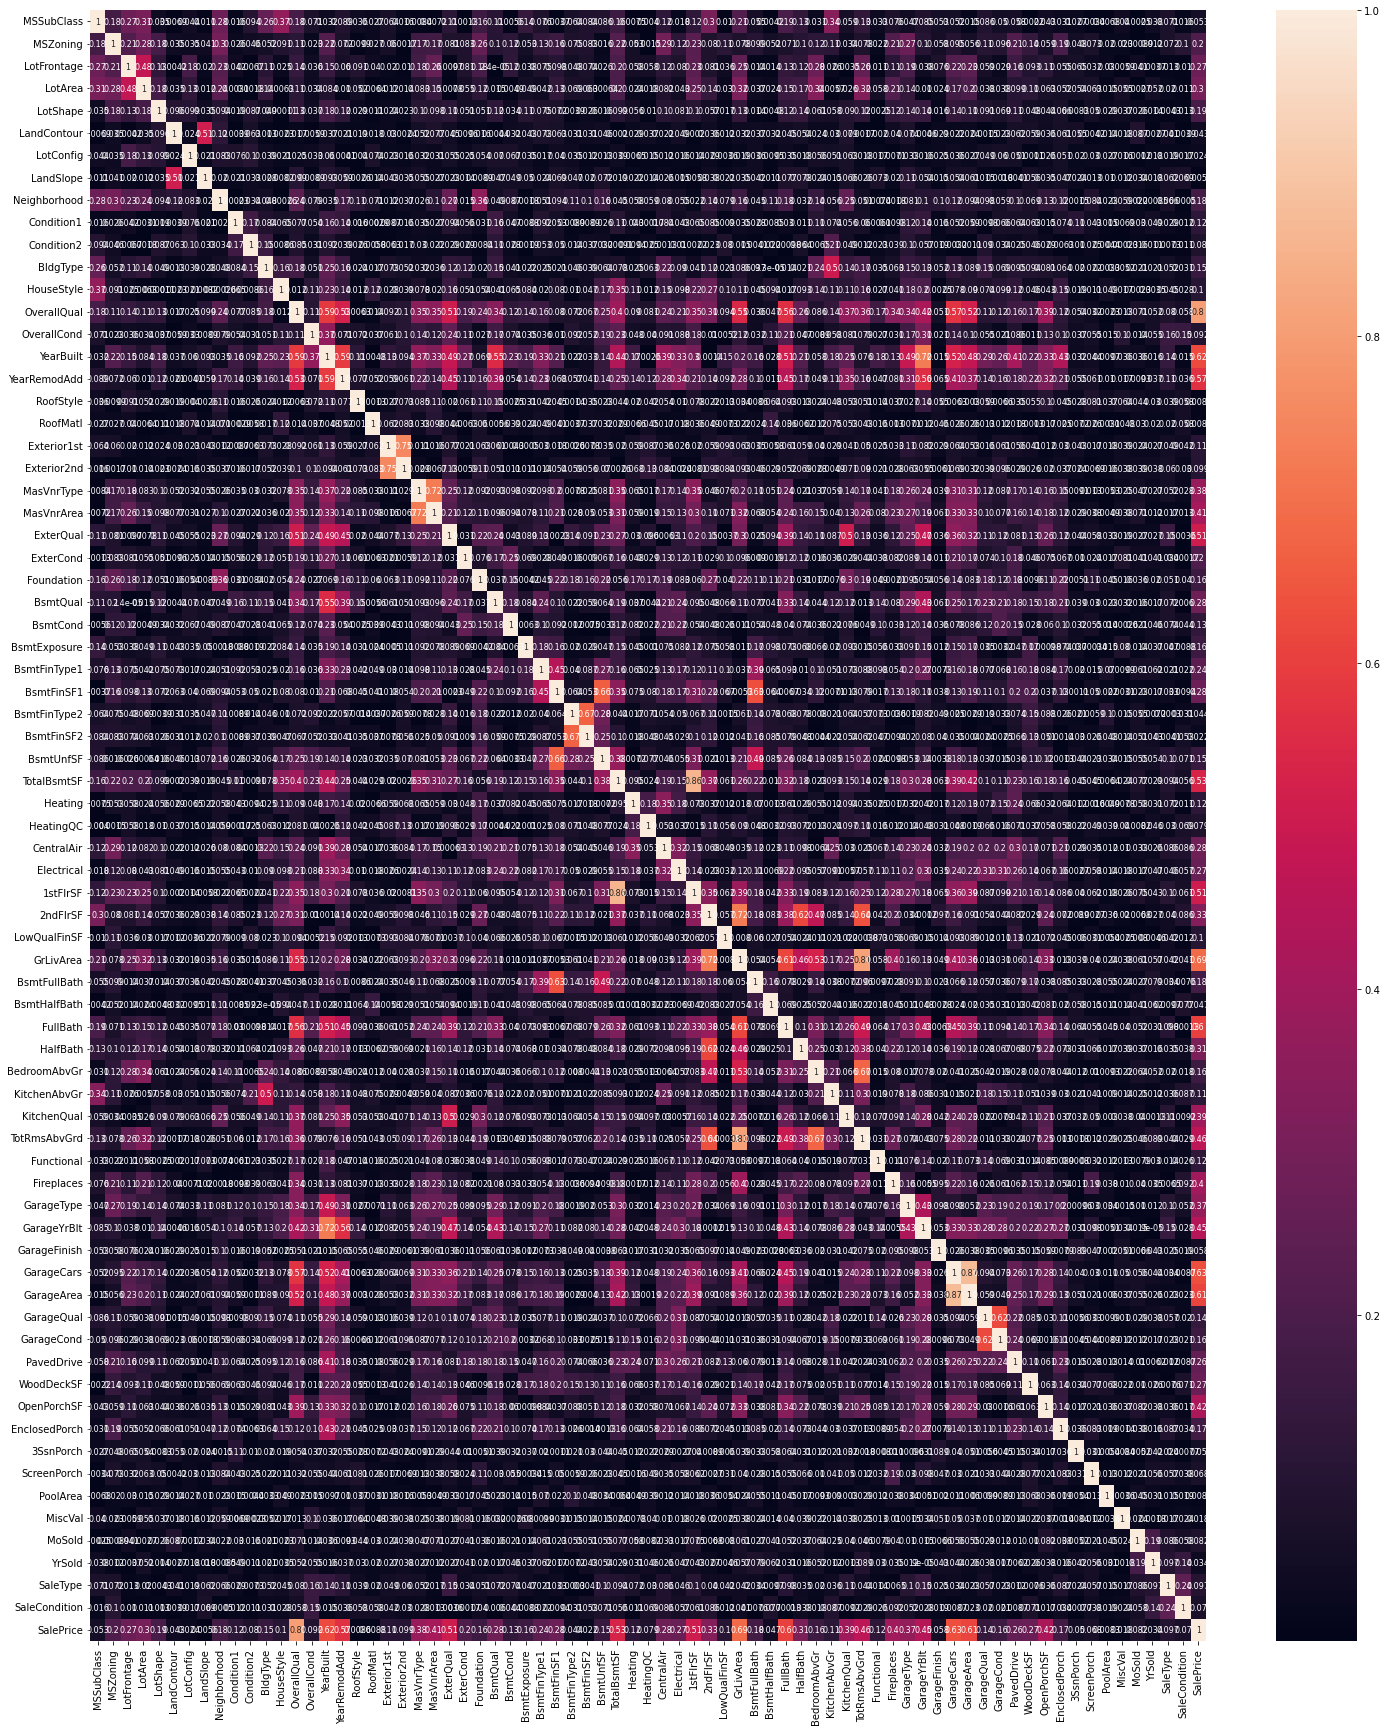

In [125]:
df_corr = data.corr().abs()

plt.figure(figsize =(25, 30))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :8})
plt.show()

<AxesSubplot:>

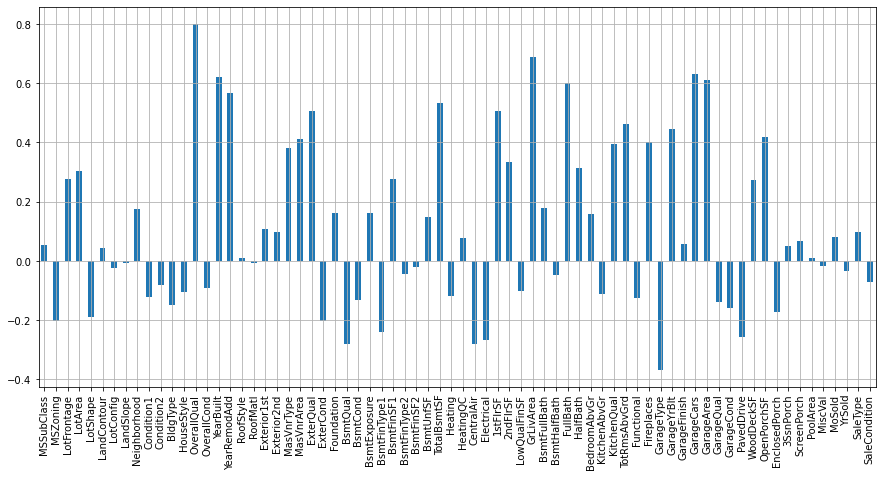

In [122]:
data.drop('SalePrice',axis =1).corrwith(data.SalePrice).plot(kind = 'bar', grid=True, figsize = (15,7))

In [126]:
# from above two charts, dropping some features.
# 'Exterior2nd', 'MasVnrType', 'TotRmsAbvGrd', 'GarageArea', 'LandContour', 'MSSubClass', 'LotConfig'
# 'LandSlope', 'RoofStyle', 'RoofMatl', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtHalfBath', 'GarageFinish'
# '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold', '1stFlrSF'

In [128]:
data = data.drop(columns = ['Exterior2nd', 'MasVnrType', 'TotRmsAbvGrd', 'GarageArea',
                            'LandContour', 'MSSubClass', 'LotConfig', 'LandSlope', 'RoofStyle', 
                            'RoofMatl', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtHalfBath', 
                            'GarageFinish', '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold', '1stFlrSF',
                           'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF'], axis =1)

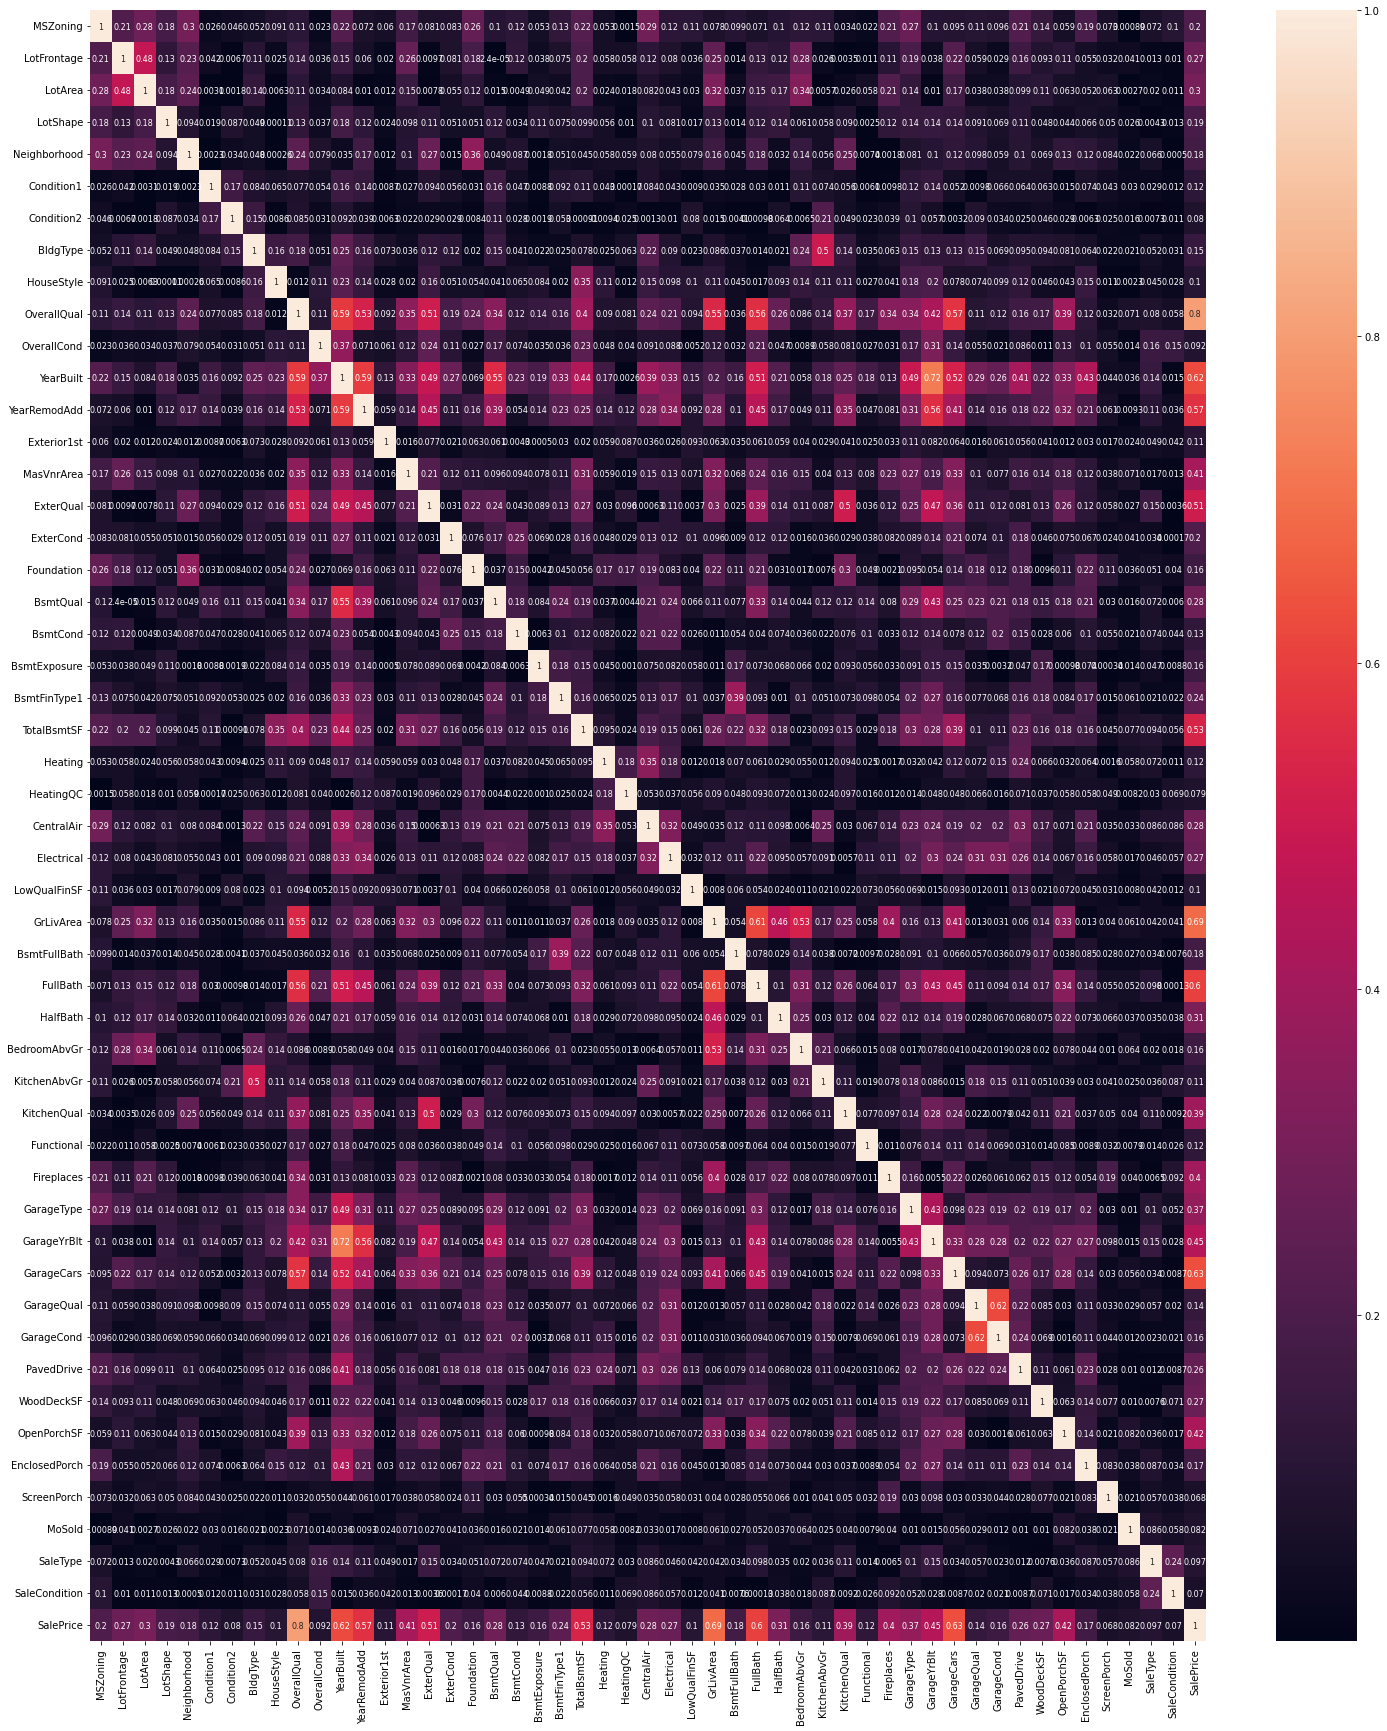

In [149]:
df_corr = data.corr().abs()

plt.figure(figsize =(25, 30))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :8})
plt.show()

In [150]:
x = data.drop(columns = ['SalePrice'],axis =1)
y = data.SalePrice

In [151]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

vif       Features
0   1.489520       MSZoning
1   1.542283    LotFrontage
2   1.628643        LotArea
3   1.138780       LotShape
4   1.508473   Neighborhood
5   1.127408     Condition1
6   1.150863     Condition2
7   1.592777       BldgType
8   1.425834     HouseStyle
9   3.328788    OverallQual
10  1.882255    OverallCond
11  7.563146      YearBuilt
12  2.688792   YearRemodAdd
13  1.098317    Exterior1st
14  1.443875     MasVnrArea
15  2.112208      ExterQual
16  1.209526      ExterCond
17  1.662804     Foundation
18  1.599949       BsmtQual
19  1.302569       BsmtCond
20  1.178014   BsmtExposure
21  1.429412   BsmtFinType1
22  2.361406    TotalBsmtSF
23  1.331934        Heating
24  1.125212      HeatingQC
25  1.683823     CentralAir
26  1.454145     Electrical
27  1.142678   LowQualFinSF
28  5.002287      GrLivArea
29  1.361604   BsmtFullBath
30  3.141015       FullBath
31  2.183869       HalfBath
32  2.014150   BedroomAbvGr
33  1.784534   KitchenAbvGr
34  1.587258    KitchenQual
35  1.182701     Functional
36  1.464572     Fireplaces
37  1.691519     GarageType
38  2.868790    GarageYrBlt
39  2.094840     GarageCars
40  1.904830     GarageQual
41  1.849661     GarageCond
42  1.436236     PavedDrive
43  1.222560     WoodDeckSF
44  1.375166    OpenPorchSF
45  1.419437  EnclosedPorch
46  1.124028    ScreenPorch
47  1.064456         MoSold
48  1.192729       SaleType
49  1.143153  SaleCondition

In [153]:
vif.loc[vif['vif'] >= 5]

vif   Features
11  7.563146  YearBuilt
28  5.002287  GrLivArea

In [154]:
# Most of the values are less than 5. SO there is no multicollinearity exists

## selection of Random state

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LinearRegression

In [157]:
lr = LinearRegression()

In [158]:
for i in range(0,101):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.75,random_state = i)
    lr.fit(x_train, y_train)
    predict_train = lr.predict(x_train)
    predict_test = lr.predict(x_test)
    print(f"At random state {i}, the train set accuracy is ",{r2_score(y_train,predict_train)})
    print(f"At random state {i}, the test set accuracy is ",{r2_score(y_test,predict_test)})

At random state 0, the train set accuracy is  {0.9052677502879133}
At random state 0, the test set accuracy is  {0.8721979331816488}
At random state 1, the train set accuracy is  {0.9090668294388068}
At random state 1, the test set accuracy is  {0.8595344653082646}
At random state 2, the train set accuracy is  {0.8949783555663708}
At random state 2, the test set accuracy is  {0.9081382616524714}
At random state 3, the train set accuracy is  {0.9013793958621661}
At random state 3, the test set accuracy is  {0.8919540882615703}
At random state 4, the train set accuracy is  {0.9060738251243114}
At random state 4, the test set accuracy is  {0.8685760967251093}
At random state 5, the train set accuracy is  {0.9013177969003477}
At random state 5, the test set accuracy is  {0.8870860760138745}
At random state 6, the train set accuracy is  {0.9097034141801794}
At random state 6, the test set accuracy is  {0.8649589857553431}
At random state 7, the train set accuracy is  {0.9025558547833186}
At

In [159]:
# at random state 97, the model perfroms well.So random state is 97
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.75,random_state = 97)
lr.fit(x_train, y_train)
predict_train = lr.predict(x_train)
predict_test = lr.predict(x_test)
print(f"The train set accuracy is ",{r2_score(y_train,predict_train)})
print(f"The test set accuracy is ",{r2_score(y_test,predict_test)})

The train set accuracy is  {0.8979260563091528}
The test set accuracy is  {0.8966287317348303}


In [160]:
#Model
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x_train, y_train)
    if train:
        train_pred = clf.predict(x_train)
        print("\n===================Train Results============")
        print('R2_score:', r2_score(y_train, train_pred)*100,'% \n')
        print('Mean Squared Error:', mean_squared_error(y_train, train_pred),'\n')
        print('Mean Absolute Error:', mean_absolute_error(y_train, train_pred),'\n')
        
    elif train == False:
        test_pred = clf.predict(x_test)
        print("\n===================Test Results============")
        print('R2_score:', r2_score(y_test, test_pred)*100,'%\n')
        print('Mean Squared Error:', mean_squared_error(y_test, test_pred),'\n')
        print('Mean Absolute Error:', mean_absolute_error(y_test, test_pred),'\n')

In [161]:
# Linear Regression
metric_score(lr,x_train,x_test,y_train,y_test,train=True)
metric_score(lr,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 89.79260563091528 % 

Mean Squared Error: 304503557.44211316 

Mean Absolute Error: 13418.178285807215 


===================Test Results============
R2_score: 89.66287317348302 %

Mean Squared Error: 310690429.91066813 

Mean Absolute Error: 13611.961230266594 



In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [163]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
gbr = GradientBoostingRegressor()

In [164]:
#random Forest
metric_score(rf,x_train,x_test,y_train,y_test,train=True)
metric_score(rf,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 97.92644666135692 % 

Mean Squared Error: 61857546.14077946 

Mean Absolute Error: 5688.845766871166 


===================Test Results============
R2_score: 87.53930324930516 %

Mean Squared Error: 374515984.5121386 

Mean Absolute Error: 14381.726238532112 



In [165]:
#decision Tree
metric_score(dt,x_train,x_test,y_train,y_test,train=True)
metric_score(dt,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 100.0 % 

Mean Squared Error: 0.0 

Mean Absolute Error: 0.0 


===================Test Results============
R2_score: 68.0672121147352 %

Mean Squared Error: 959764909.8073394 

Mean Absolute Error: 22972.743119266055 



In [166]:
# KNN
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 84.03215849802443 % 

Mean Squared Error: 476347279.8454601 

Mean Absolute Error: 15670.414417177913 


===================Test Results============
R2_score: 76.70631248170656 %

Mean Squared Error: 700109992.913945 

Mean Absolute Error: 18759.353211009173 



In [167]:
#gbr
metric_score(gbr,x_train,x_test,y_train,y_test,train=True)
metric_score(gbr,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 96.5111022306828 % 

Mean Squared Error: 104079625.40632255 

Mean Absolute Error: 7823.889735713238 


===================Test Results============
R2_score: 89.41275628175894 %

Mean Squared Error: 318207888.6709046 

Mean Absolute Error: 13106.578130256388 



### Cross Validation

In [170]:
from sklearn.model_selection import KFold, cross_val_score

In [173]:
cross_val_score(lr, x_train, y_train, scoring='r2', cv=5).mean()

0.8657414814745008

In [174]:
cross_val_score(rf, x_train, y_train, scoring='r2', cv=5).mean()

0.8364898924872246

In [175]:
cross_val_score(dt, x_train, y_train, scoring='r2', cv=5).mean()

0.6559170588068215

In [176]:
cross_val_score(knn, x_train, y_train, scoring='r2', cv=5).mean()

0.7383017889373817

In [177]:
cross_val_score(gbr, x_train, y_train, scoring='r2', cv=5).mean()

0.8683823555640057

In [168]:
# Gradient Boost DT gives the best performance. so i selected Random Forest as final Model

## Hyperparameter Tuning

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV

In [181]:
params = {'n_estimators': [11,13,15,17],
         'max_depth':range(0,20),
         'min_samples_split':[2,3,4,5,6],
         'min_samples_leaf':[2,4,3,5,6]
         }

In [182]:
grd = GridSearchCV(gbr,param_grid=params)

In [183]:
grd.fit(x_train,y_train)
grd.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 17}

In [210]:
Model_tuned = GradientBoostingRegressor(n_estimators=27,max_depth=5,min_samples_leaf=9,min_samples_split=5)
Model_tuned.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=9, min_samples_split=5,
                          n_estimators=27)

In [211]:
metric_score(Model_tuned,x_train,x_test,y_train,y_test,train=True)
metric_score(Model_tuned,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 95.08231341551196 % 

Mean Squared Error: 146702773.03062946 

Mean Absolute Error: 8899.32897187954 


===================Test Results============
R2_score: 86.80286251666666 %

Mean Squared Error: 396650286.5930851 

Mean Absolute Error: 14406.42000113272 



In [212]:
#saving the model

In [215]:
name = 'Housing Project'
pickle.dump(Model_tuned,open(name,'wb'))

In [216]:
saved_mod = pickle.load(open(name,'rb'))

In [217]:
prediction = saved_mod.predict(x_train)
prediction

array([146793.00100972, 221646.70319975, 277592.24119198, 137002.69101323,
       149224.70549045, 194721.75008961, 152915.62606957, 281398.4322299 ,
       121979.25174178, 258492.32186704, 127962.84625118, 156365.64287311,
       110589.03220626, 182721.62575   , 138921.03402293, 165559.4965946 ,
       156873.79294139, 164259.9348215 , 229537.48467019, 131440.02424545,
       156096.36324536, 138037.68705632, 162227.02823047, 249431.63055865,
       123025.88632918,  83581.2672503 , 172294.28219422, 136991.33130324,
       116940.76534415, 275169.96042116, 121591.2648993 , 177369.78898879,
       177743.09546756, 135129.67616961, 121372.97337771, 178800.51073439,
       104118.58748943, 119086.8167921 , 120003.17911182, 141870.23546546,
       296316.17653679, 169302.49630546, 223324.23224979, 128168.21802026,
       180376.67613742, 175293.69037132, 128225.36866899, 184587.80648627,
       123194.08442248, 194534.9369501 , 140774.38215357, 284545.59153709,
       150168.62780436, 2

In [218]:
y_train

756     144500
373     227680
835     319000
879     127000
1146    136000
782     199900
926     149000
442     293077
1065    116500
575     248000
298     117000
773     151000
85      102000
780     183000
201     145000
970     130500
827     148800
844     162500
1112    236000
477     132000
958     169500
1093    129000
540     161500
1104    265979
33      128500
160      82000
737     172500
235     135000
293     110000
703     290000
182     125500
153     174000
526     159895
21      133000
260     137500
167     178000
285      82500
823     120500
975     114500
354     149900
862     318061
29      188700
336     226000
234     120000
906     179200
117     187500
184     107500
1167    183200
718     127000
605     189000
590     122000
666     305900
438     164000
331     234000
238      98000
990     116000
105     115000
742     210000
811     147000
1026    133000
454     176500
886     240000
885     227000
28      113000
955     124000
704     185900
843     15

In [219]:
#prediction is almost close to the actual with some variation.

## Test Prediction

In [221]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
5     650         180       RM         21.0     1936   Pave   NaN      Reg   
6    1453         180       RM         35.0     3675   Pave   NaN      Reg   
7     152          20       RL        107.0    13891   Pave   NaN      Reg   
8     427          80       RL          NaN    12800   Pave   NaN      Reg   
9     776         120       RM         32.0     4500   Pave   NaN      Reg   
10     30          30       RM         60.0     6324   Pave   NaN      IR1   
11   1425          20       RL          NaN     9503   Pave   NaN      Reg   
12    423          20       RL        100.0    21750   Pave   NaN      Reg   
13   1185          20       RL         50.0    35133   Grvl   NaN      Reg   
14    775          20       RL        110.0    14226   Pave   NaN      Reg   
15    391          50       RL         50.0     8405   Pave  Grvl      Reg   
16   1408          20       RL          NaN     8780   Pave   NaN      IR1   
17    513          20       RL         70.0     9100   Pave   NaN      Reg   
18   1266         160       FV         35.0     3735   Pave   NaN      Reg   
19    173         160       RL         44.0     5306   Pave   NaN      IR1   
20   1150          70       RM         50.0     9000   Pave   NaN      Reg   
21    797          20       RL         71.0     8197   Pave   NaN      Reg   
22    137          20       RL          NaN    10355   Pave   NaN      IR1   
23    706         190       RM         70.0     5600   Pave   NaN      Reg   
24   1377          30       RL         52.0     6292   Pave   NaN      Reg   
25   1177          20       RL         37.0     6951   Pave   NaN      IR1   
26   1456          60       RL         62.0     7917   Pave   NaN      Reg   
27    369          20       RL         78.0     7800   Pave   NaN      Reg   
28   1421          60       RL         90.0    11700   Pave   NaN      Reg   
29    999          30       RM         60.0     9786   Pave   NaN      Reg   
30   1217          90       RM         68.0     8930   Pave   NaN      Reg   
31    937          20       RL         67.0    10083   Pave   NaN      Reg   
32    769          20       RL         70.0     9100   Pave   NaN      Reg   
33    831          20       RL         80.0    11900   Pave   NaN      IR1   
34    678          30       RL         52.0     9022   Pave   NaN      Reg   
35    574          80       RL         76.0     9967   Pave   NaN      IR1   
36    921          60       RL         70.0     8462   Pave   NaN      IR1   
37   1292         160       RM         21.0     1680   Pave   NaN      Reg   
38   1277          60       RL          NaN    12936   Pave   NaN      IR1   
39    676         160       RL         24.0     2289   Pave   NaN      Reg   
40    108          20       RM         50.0     6000   Pave   NaN      Reg   
41    424          60       RL         80.0     9200   Pave   NaN      Reg   
42    823          60       RL          NaN    12394   Pave   NaN      IR1   
43   1455          20       FV         62.0     7500   Pave  Pave      Reg   
44    377          85       RL         57.0     8846   Pave   NaN      IR1   
45   1256          50       RM         52.0     6240   Pave   NaN      Reg   
46   1120          20       RL         70.0     7560   Pave   NaN      Reg   
47    265          30       RM         30.0     5232   Pave  Grvl      IR3   
48   1158         120       RL         34.0     5001   Pave   NaN      IR1   
49    725          20       RL         86.0    13286   Pave   NaN      IR1   
50   1378          50       R

In [239]:
test = test.drop(columns = ['Street', 'Alley', 'PoolQC', 'Fence', 'FireplaceQu', 'MiscFeature', 'Id', 'Utilities'], axis=1)

In [240]:
from sklearn.preprocessing import OrdinalEncoder
for i in test.columns:
    if test[i].dtypes == 'object':
        enco = OrdinalEncoder(categories=[test[i].unique()])
        test[i] = enco.fit_transform(test[[i]])

In [241]:
test = test.drop(columns = ['Exterior2nd', 'MasVnrType', 'TotRmsAbvGrd', 'GarageArea',
                            'LandContour', 'MSSubClass', 'LotConfig', 'LandSlope', 'RoofStyle', 
                            'RoofMatl', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtHalfBath', 
                            'GarageFinish', '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold', '1stFlrSF',
                           'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF'], axis =1)

In [247]:
test.isna().sum()

MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
Exterior1st      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageCars       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
MoSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [246]:
test= test.dropna()

In [251]:
test.shape

(223, 50)

In [248]:
test_scaled = scale.fit_transform(test)

In [249]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

vif       Features
0   1.489520       MSZoning
1   1.542283    LotFrontage
2   1.628643        LotArea
3   1.138780       LotShape
4   1.508473   Neighborhood
5   1.127408     Condition1
6   1.150863     Condition2
7   1.592777       BldgType
8   1.425834     HouseStyle
9   3.328788    OverallQual
10  1.882255    OverallCond
11  7.563146      YearBuilt
12  2.688792   YearRemodAdd
13  1.098317    Exterior1st
14  1.443875     MasVnrArea
15  2.112208      ExterQual
16  1.209526      ExterCond
17  1.662804     Foundation
18  1.599949       BsmtQual
19  1.302569       BsmtCond
20  1.178014   BsmtExposure
21  1.429412   BsmtFinType1
22  2.361406    TotalBsmtSF
23  1.331934        Heating
24  1.125212      HeatingQC
25  1.683823     CentralAir
26  1.454145     Electrical
27  1.142678   LowQualFinSF
28  5.002287      GrLivArea
29  1.361604   BsmtFullBath
30  3.141015       FullBath
31  2.183869       HalfBath
32  2.014150   BedroomAbvGr
33  1.784534   KitchenAbvGr
34  1.587258    KitchenQual
35  1.182701     Functional
36  1.464572     Fireplaces
37  1.691519     GarageType
38  2.868790    GarageYrBlt
39  2.094840     GarageCars
40  1.904830     GarageQual
41  1.849661     GarageCond
42  1.436236     PavedDrive
43  1.222560     WoodDeckSF
44  1.375166    OpenPorchSF
45  1.419437  EnclosedPorch
46  1.124028    ScreenPorch
47  1.064456         MoSold
48  1.192729       SaleType
49  1.143153  SaleCondition

In [250]:
result = Model_tuned.predict(test_scaled)
result

array([265106.80359198, 159578.76219928, 185613.11550746, 140710.4294198 ,
       257697.27252796, 164919.44766974, 103648.99339325, 121451.26296933,
       147164.24531925, 260310.70632732, 124668.86230023, 119246.57488831,
       160345.21277549, 178986.13142209, 148910.57727107, 158249.85251069,
       108714.34601457, 122001.46812109, 175268.65461041, 141985.87317672,
       153859.17132281,  95340.76196477, 227102.01442307, 166402.6001386 ,
       109489.79120847, 171786.40126064, 170698.30353679, 135934.29290107,
       158748.03599512, 102998.37246207, 284283.46355455, 175077.03833139,
       131261.62360347, 122087.46511811, 122027.57570038, 101858.4609155 ,
       185449.78703019, 262014.44415936, 131273.39999091,  97512.44902915,
       105143.32448924, 238332.09298095, 133191.72640142, 169810.04338427,
       113147.74332139, 209842.70235604, 118844.6394331 , 124638.5318764 ,
       148965.48815458, 182831.88509252, 113534.63928605, 147157.76670694,
       189314.35003285, 1

In [256]:
result = pd.DataFrame(result)

In [257]:
result.to_excel('result.xlsx')

In [258]:
writer = pd.ExcelWriter('result.xlsx', engine='xlsxwriter')
result.to_excel(writer, sheet_name='AnotherSheet')
writer.save()

## End of Project